In [1]:
import numpy as np 
#from matplotlib import use
#use("nbAgg")
import matplotlib.pyplot as plt
from Ising import Ising
from time import process_time,time

In [2]:
temp = 0.4
N = 50
nmarkov = 50**2
obj = Ising(temp=temp,N=N)

 cpu time for cycle t= 13.9787236


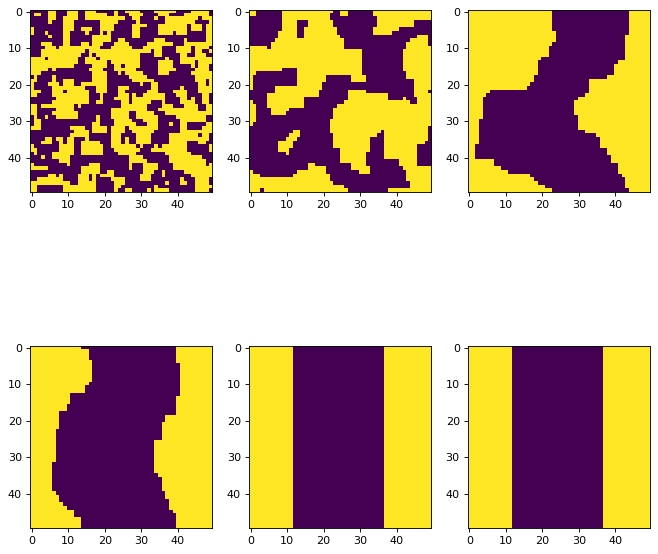

In [3]:
f = plt.figure(figsize=(10, 10), dpi=80); 
tic = process_time()
print_times = [1,10,100,200,500,999]
#print_times = [1,nmarkov/100,nmarkov/100*25,nmarkov/100*50,nmarkov/100*75,nmarkov-1]
for i in range (1000):
    table = obj.evoluzione()
    if(i == print_times[0]):
        fig0 = f.add_subplot(231)
        fig0.imshow(table)
    if(i == print_times[1]):
        fig1 = f.add_subplot(232)
        fig1.imshow(table)
        f.show()
    if(i == print_times[2]):
        fig2 = f.add_subplot(233)
        fig2.imshow(table)
    if(i == print_times[3]):
        fig3 = f.add_subplot(234)
        fig3.imshow(table)
    if(i == print_times[4]):
        fig4 = f.add_subplot(235)
        fig4.imshow(table)
    if(i == print_times[5]):
        fig5 = f.add_subplot(236)
        fig5.imshow(table)
    f.show()
print(" cpu time for cycle t=", process_time()-tic)

In [ ]:
Npoints = 10
step_stabilizzazione = 1001
step_media = 1001
E = np.zeros(Npoints)
M = np.zeros(Npoints)
C = np.zeros(Npoints)
temp = np.linspace(1,5,Npoints,endpoint=False)
tic = process_time()

for i in range(Npoints):
    Et = 0
    Mt = 0
    Ct = 0
    obj = Ising(temp=temp[i],N=N)
    
    for j in range(step_stabilizzazione):
        obj.evoluzione()
        
    obj.Et = obj.energia()
    obj.Mt = obj.magnetizzazione()
    obj.Ct = obj.capacita()
    
    for j in range(step_media):
        
        obj.evoluzione()
        Et += obj.get_energia()
        Mt += obj.get_magnetizzazione()
        Ct += obj.get_capacita()
    
    norm1 = ((N**2)*step_media) 
    norm2 = ((N**2)*(step_media**2))
    E[i] = Et/norm1
    M[i] = Mt/norm1
    C[i] = Ct/norm2
print(" cpu time for cycle t=", process_time()-tic)

In [ ]:
plt.scatter(temp,E,marker="o")

In [ ]:
plt.scatter(temp,abs(M),marker="o")

In [ ]:
plt.scatter(temp,C,marker="o")